# Importing and Installing Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install shap

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow

In [ ]:
tensorflow.compat.v1.disable_v2_behavior()

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import keras
import shap
from numpy import dstack
from sklearn.utils import class_weight
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Read Data

In [ ]:
X=pd.read_csv('/content/drive/My Drive/darknet_dataset_processed.csv')
onehotlabels=pd.read_csv('/content/drive/My Drive/labels_new.csv')

In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes = 4
onehotlabels = to_categorical(onehotlabels, num_classes=num_classes)

In [ ]:
columns_to_drop = X.columns[:7].tolist() + X.columns[-2:].tolist()
X = X.drop(columns=columns_to_drop, axis=1)

In [ ]:
feat = X.columns

# Train test split

In [ ]:
from sklearn.preprocessing import StandardScaler

# 创建StandardScaler对象
scaler = StandardScaler()

# 对数据进行Z-score归一化
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, onehotlabels, train_size=0.8, random_state=50)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, train_size=0.9, random_state=50)

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
# Reshaping the Data to feed it to the model
X_train=X_train.reshape(-1, 76, 1)
X_val = X_val.reshape(-1, 76, 1)
X_test = X_test.reshape((-1, 76, 1))

In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_val=pd.DataFrame(y_val)
y_train = y_train.iloc[:,1:]
y_test = y_test.iloc[:,1:]
y_val = y_val.iloc[:,1:]

# CNN Model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.activations import relu, softmax

# 创建CNN模型
cnn = Sequential()

# 第一个Convolution层
cnn.add(Conv1D(64, 2, activation=relu, input_shape=(76, 1)))

# 第二个Convolution层
cnn.add(Conv1D(64, 2, activation=relu))

# MaxPooling层
cnn.add(MaxPooling1D(pool_size=2))

# Dropout层
cnn.add(Dropout(0.5))

# Flatten层
cnn.add(Flatten())

# 100个节点的全连接层
cnn.add(Dense(100, activation=relu))

# 输出层，4个节点，使用Softmax激活函数
cnn.add(Dense(4, activation=softmax))

# 编译模型
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型概要
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 75, 64)            192       
                                                                 
 conv1d_11 (Conv1D)          (None, 74, 64)            8256      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 37, 64)           0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 37, 64)            0         
                                                                 
 flatten_7 (Flatten)         (None, 2368)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               236900    
                                                      

### DeepExplainer: CNN

In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 4000, replace=False)]
#print(background)
# DeepExplainer to explain predictions of the model
explainer_cnn = shap.DeepExplainer(cnn, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_cnn = explainer_cnn.shap_values(X_test[:5])

In [ ]:
num_runs = 5
shap_values_cnn_list = []

for i in range(num_runs):
    shap_values_cnn = explainer_cnn.shap_values(X_test[:5])
    shap_values_cnn_list.append(shap_values_cnn)

In [ ]:
shap_values_cnn_avg = np.mean(shap_values_cnn_list, axis=0)

In [ ]:
len(shap_values_cnn_avg)

4

In [ ]:
shap_values_cnn[0]

array([[[ 4.09105375e-03],
        [ 4.26354946e-05],
        [-2.68595392e-05],
        [-1.79734637e-04],
        [-2.62468138e-05],
        [ 1.93386456e-03],
        [ 3.77858916e-03],
        [ 8.51510099e-04],
        [-1.62873507e-03],
        [-1.62315115e-03],
        [ 4.01824087e-03],
        [ 5.49101918e-04],
        [ 2.97985746e-03],
        [ 2.38628318e-04],
        [-1.19570182e-03],
        [-9.13437165e-04],
        [ 3.01504346e-03],
        [-3.86622477e-03],
        [ 2.65797365e-05],
        [-3.34667550e-03],
        [-1.35121505e-03],
        [ 1.43795563e-02],
        [ 2.56171508e-03],
        [-1.67632229e-04],
        [-1.84803401e-03],
        [ 1.17098949e-03],
        [-3.22448561e-02],
        [-7.01956849e-03],
        [-1.32072749e-04],
        [ 5.92003487e-03],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-5.69250385e-04],
        [-2.27964895e-04],
        [ 3.27065964e-04],
        [ 1.38642038e-04],
 

In [ ]:
shap.initjs()
shap.force_plot(explainer_cnn.expected_value[0], shap_values_cnn_avg[0][0])

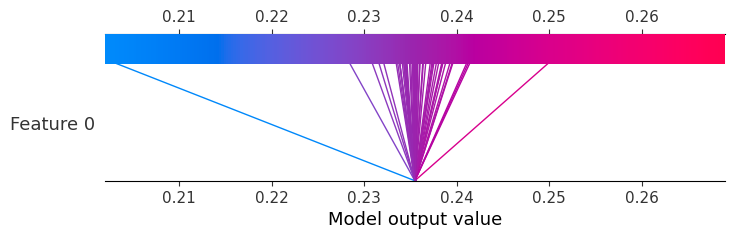

In [ ]:
shap.decision_plot(explainer_cnn.expected_value[0],
                   shap_values_cnn_avg[0][0])

In [ ]:
precision_number_C = []
accuracy_number_C = []
recall_number_C = []
f1score_number_C = []

## **Top 1 features**

In [ ]:
k=1

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]

top_k_features_cnn

['Bwd IAT Std']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
feature_importances=[]

for i in range(1):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

len(feature_importances)

1

In [ ]:
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

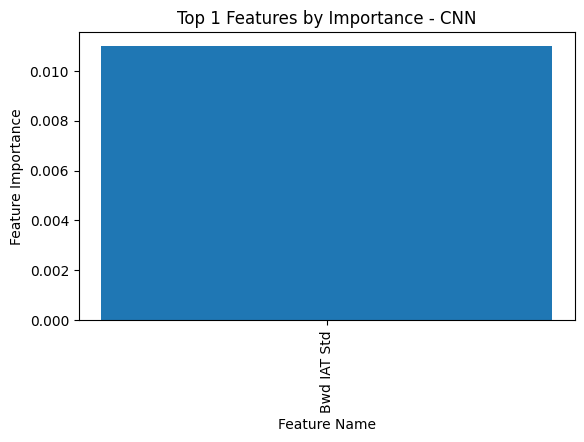

In [ ]:
import matplotlib.pyplot as plt
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 1 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

In [ ]:
rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))

precision_number_C.append(0.55)
accuracy_number_C.append(0.77)
recall_number_C.append(0.43)
f1score_number_C.append(0.42)

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      9315
           1       0.56      0.00      0.01      2318
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00      2366

   micro avg       0.66      0.65      0.66     14149
   macro avg       0.30      0.25      0.20     14149
weighted avg       0.53      0.65      0.52     14149
 samples avg       0.65      0.65      0.65     14149

0.6502933069474874


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 2 features**

In [ ]:
k=2

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]

top_k_features_cnn

['Bwd IAT Std', 'Fwd IAT Max']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
feature_importances=[]

for i in range(2):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

len(feature_importances)

2

In [ ]:
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

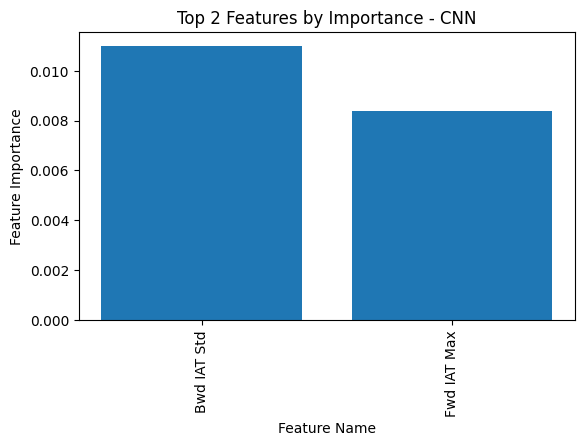

In [ ]:
import matplotlib.pyplot as plt
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 2 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

In [ ]:
rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))

precision_number_C.append(0.59)
accuracy_number_C.append(0.76)
recall_number_C.append(0.41)
f1score_number_C.append(0.41)

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      9315
           1       0.91      0.37      0.52      2318
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00      2366

   micro avg       0.72      0.71      0.72     14149
   macro avg       0.40      0.34      0.34     14149
weighted avg       0.62      0.71      0.63     14149
 samples avg       0.71      0.71      0.71     14149

0.7124885150894056


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 3 features**

In [ ]:
k=3

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]

top_k_features_cnn

['Bwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Max']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
feature_importances=[]

for i in range(3):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

len(feature_importances)

3

In [ ]:
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

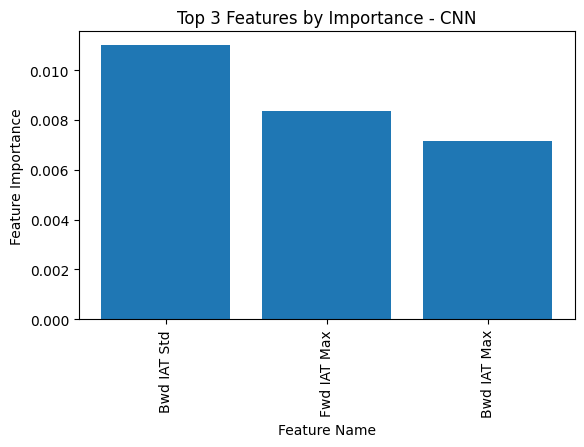

In [ ]:
import matplotlib.pyplot as plt
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 3 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

In [ ]:
rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))

precision_number_C.append(0.63)
accuracy_number_C.append(0.82)
recall_number_C.append(0.51)
f1score_number_C.append(0.54)

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      9315
           1       0.91      0.36      0.52      2318
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00      2366

   micro avg       0.72      0.71      0.72     14149
   macro avg       0.40      0.34      0.34     14149
weighted avg       0.62      0.71      0.63     14149
 samples avg       0.71      0.71      0.71     14149

0.7132659551911796


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 10 features**

In [ ]:
k=10

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]

top_k_features_cnn

['Bwd IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Max',
 'Flow IAT Max',
 'Fwd IAT Mean',
 'Flow IAT Min',
 'Bwd Segment Size Avg',
 'Fwd IAT Total',
 'FIN Flag Count',
 'Fwd IAT Std']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
feature_importances=[]

for i in range(10):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

len(feature_importances)

10

In [ ]:
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

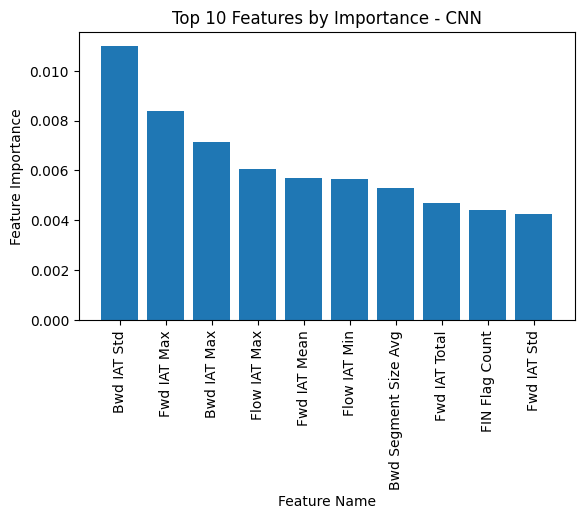

In [ ]:
import matplotlib.pyplot as plt
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 10 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

In [ ]:
rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))

precision_number_C.append(0.95)
accuracy_number_C.append(0.88)
recall_number_C.append(0.62)
f1score_number_C.append(0.70)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9315
           1       0.94      0.58      0.72      2318
           2       0.00      0.00      0.00       150
           3       0.92      0.60      0.73      2366

   micro avg       0.89      0.85      0.87     14149
   macro avg       0.68      0.54      0.59     14149
weighted avg       0.88      0.85      0.85     14149
 samples avg       0.85      0.85      0.85     14149

0.8480457982896318


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 30 features**

In [ ]:
k=30

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]

top_k_features_cnn

['Bwd IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Max',
 'Flow IAT Max',
 'Fwd IAT Mean',
 'Flow IAT Min',
 'Bwd Segment Size Avg',
 'Fwd IAT Total',
 'FIN Flag Count',
 'Fwd IAT Std',
 'Packet Length Min',
 'Idle Min',
 'Bwd Packet Length Min',
 'Flow Duration',
 'Fwd Packet Length Min',
 'Fwd Packet Length Max',
 'Flow Packets/s',
 'Fwd IAT Min',
 'SYN Flag Count',
 'Fwd Packet Length Std',
 'Subflow Fwd Packets',
 'Bwd IAT Mean',
 'Bwd Packet Length Mean',
 'Packet Length Std',
 'Flow IAT Std',
 'Idle Max',
 'Flow IAT Mean',
 'Idle Std',
 'Fwd PSH Flags',
 'Bwd Packet Length Std']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
feature_importances=[]

for i in range(30):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

len(feature_importances)

30

In [ ]:
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

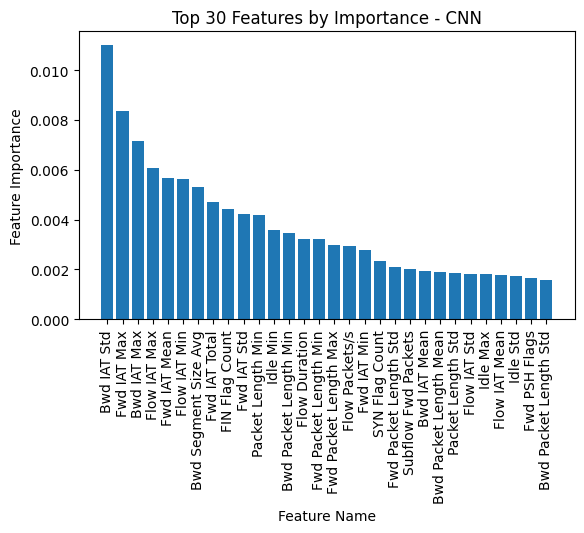

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 30 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

In [ ]:
rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9315
           1       0.94      0.68      0.79      2318
           2       0.98      0.35      0.52       150
           3       0.93      0.64      0.76      2366

   micro avg       0.94      0.88      0.91     14149
   macro avg       0.95      0.67      0.76     14149
weighted avg       0.94      0.88      0.90     14149
 samples avg       0.88      0.88      0.88     14149

0.8799208424623648


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


# Feature Importance Validation: CNN

In [ ]:
k=20

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]


In [ ]:
top_k_features_cnn

['Bwd IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Max',
 'Flow IAT Max',
 'Fwd IAT Mean',
 'Flow IAT Min',
 'Bwd Segment Size Avg',
 'Fwd IAT Total',
 'FIN Flag Count',
 'Fwd IAT Std',
 'Packet Length Min',
 'Idle Min',
 'Bwd Packet Length Min',
 'Flow Duration',
 'Fwd Packet Length Min',
 'Fwd Packet Length Max',
 'Flow Packets/s',
 'Fwd IAT Min',
 'SYN Flag Count',
 'Fwd Packet Length Std']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.01100471]), array([0.00837319]), array([0.0071384]), array([0.00605817]), array([0.00567777]), array([0.00564289]), array([0.00529306]), array([0.0047001]), array([0.00440825]), array([0.00423266]), array([0.00418205]), array([0.00357997]), array([0.0034759]), array([0.00320851]), array([0.00320595]), array([0.0029631]), array([0.0029502]), array([0.00278226]), array([0.0023319]), array([0.00210858]), array([0.0020222]), array([0.00192875]), array([0.00191405]), array([0.00187403]), array([0.00183304]), array([0.0018312]), array([0.0017835]), array([0.00174876]), array([0.0016704]), array([0.00158746]), array([0.00157198]), array([0.00152186]), array([0.00105902]), array([0.00098187]), array([0.00097373]), array([0.00084418]), array([0.00080027]), array([0.00079703]), array([0.00078788]), array([0.00074772]), array([0.00074512]), array([0.00069938]), array([0.00069281]), array([0.00058602]), array([0.0004914]), array([0.0004448]), array([0.0003364]), array([0.0002

In [ ]:
# extract the values inside the arrays as a list
#feature_importances = [item for item in list(sorted_feature_shap_dict.values())[0][0] ]

In [ ]:
feature_importances=[]

for i in range(20):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

In [ ]:
len(feature_importances)

20

In [ ]:
# Dict of features and Importance sorted from high to low
sorted_feature_shap_dict

{'Bwd IAT Std': array([0.01100471]),
 'Fwd IAT Max': array([0.00837319]),
 'Bwd IAT Max': array([0.0071384]),
 'Flow IAT Max': array([0.00605817]),
 'Fwd IAT Mean': array([0.00567777]),
 'Flow IAT Min': array([0.00564289]),
 'Bwd Segment Size Avg': array([0.00529306]),
 'Fwd IAT Total': array([0.0047001]),
 'FIN Flag Count': array([0.00440825]),
 'Fwd IAT Std': array([0.00423266]),
 'Packet Length Min': array([0.00418205]),
 'Idle Min': array([0.00357997]),
 'Bwd Packet Length Min': array([0.0034759]),
 'Flow Duration': array([0.00320851]),
 'Fwd Packet Length Min': array([0.00320595]),
 'Fwd Packet Length Max': array([0.0029631]),
 'Flow Packets/s': array([0.0029502]),
 'Fwd IAT Min': array([0.00278226]),
 'SYN Flag Count': array([0.0023319]),
 'Fwd Packet Length Std': array([0.00210858]),
 'Subflow Fwd Packets': array([0.0020222]),
 'Bwd IAT Mean': array([0.00192875]),
 'Bwd Packet Length Mean': array([0.00191405]),
 'Packet Length Std': array([0.00187403]),
 'Flow IAT Std': array([0

# Feature Importance Plot

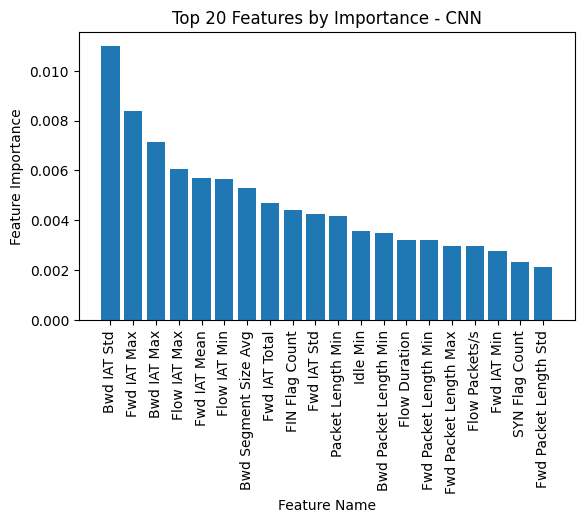

In [ ]:
import matplotlib.pyplot as plt

# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 20 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()


## Train test split to validate CNN-SHAP

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(X, columns=feat)
X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( df[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

## Random forest to validate feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_te_cnn, y_pred_rf_cnn))
print(accuracy_score(y_te_cnn, y_pred_rf_cnn))


precision_number_C.append(0.96)
accuracy_number_C.append(0.90)
recall_number_C.append(0.80)
f1score_number_C.append(0.87)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9315
           1       0.93      0.67      0.78      2318
           2       1.00      0.09      0.17       150
           3       0.93      0.63      0.75      2366

   micro avg       0.91      0.87      0.89     14149
   macro avg       0.94      0.60      0.66     14149
weighted avg       0.92      0.87      0.88     14149
 samples avg       0.87      0.87      0.87     14149

0.8717930595801824


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Flatten
from keras.activations import softmax

# 创建LSTM模型
lstm = Sequential()

# 第一个LSTM层，输入数据规格为(76, 1)
lstm.add(LSTM(64, input_shape=(76, 1), return_sequences=True))

# 第二个LSTM层，输入规格为(76, 64)，并设置return_sequences为True
lstm.add(LSTM(32, return_sequences=True))

# Dropout层，规格为(32,)，dropout删除率为50%
lstm.add(Dropout(0.5))

# Flatten层
lstm.add(Flatten())

# 100个节点的全连接层
lstm.add(Dense(100))

# 25个节点的全连接层
lstm.add(Dense(25))

# 输出层，激活函数为Softmax，4个节点
lstm.add(Dense(4, activation=softmax))

# 编译模型
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型概要
lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 76, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 76, 32)            12416     
                                                                 
 dropout_8 (Dropout)         (None, 76, 32)            0         
                                                                 
 flatten_8 (Flatten)         (None, 2432)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               243300    
                                                                 
 dense_19 (Dense)            (None, 25)                2525      
                                                                 
 dense_20 (Dense)            (None, 4)                

### DeepExplainer: LSTM

In [ ]:
# background = X_train[np.random.choice(X_train.shape[0], 4000, replace=False)]
#print(background)
# DeepExplainer to explain predictions of the model
explainer_lstm = shap.DeepExplainer(lstm, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_lstm = explainer_lstm.shap_values(X_test[:5])

In [ ]:
num_runs = 5
shap_values_lstm_list = []

for i in range(num_runs):
    shap_values_lstm = explainer_lstm.shap_values(X_test[:5])
    shap_values_lstm_list.append(shap_values_lstm)

In [ ]:
shap_values_lstm_avg = np.mean(shap_values_lstm_list, axis=0)

In [ ]:
shap.initjs()
shap.force_plot(explainer_lstm.expected_value[0], shap_values_lstm_avg[0][0])

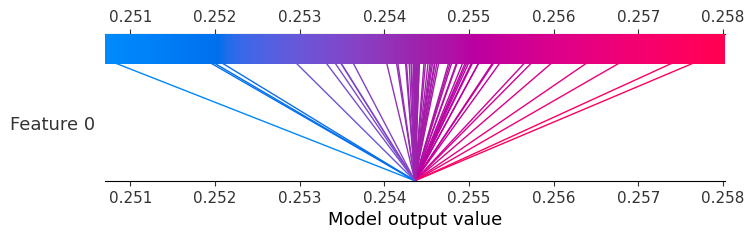

In [ ]:
shap.decision_plot(explainer_lstm.expected_value[0],
                   shap_values_lstm_avg[0][0])

In [ ]:
precision_number_L = []
accuracy_number_L = []
recall_number_L = []
f1score_number_L = []

## **Top 1 features**

In [ ]:
k=1

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]

top_k_features_lstm

['Fwd Seg Size Min']

In [ ]:
feature_importances_lstm=[]

for i in range(1):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

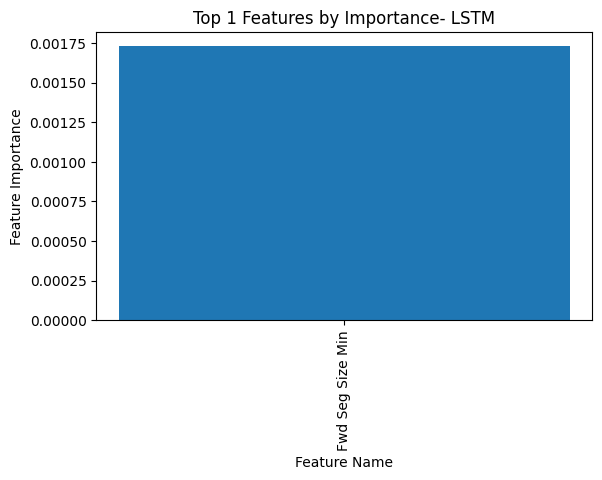

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 1 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))

precision_number_L.append(0.66)
accuracy_number_L.append(0.75)
recall_number_L.append(0.47)
f1score_number_L.append(0.52)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      9315
           1       0.83      0.03      0.05      2318
           2       0.00      0.00      0.00       150
           3       0.60      0.21      0.31      2366

   micro avg       0.91      0.54      0.68     14149
   macro avg       0.59      0.25      0.30     14149
weighted avg       0.86      0.54      0.62     14149
 samples avg       0.54      0.54      0.54     14149

0.5419464273093505


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 2 features**

In [ ]:
k=2

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]

top_k_features_lstm

['Fwd Seg Size Min', 'Bwd Packet Length Min']

In [ ]:
feature_importances_lstm=[]

for i in range(2):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

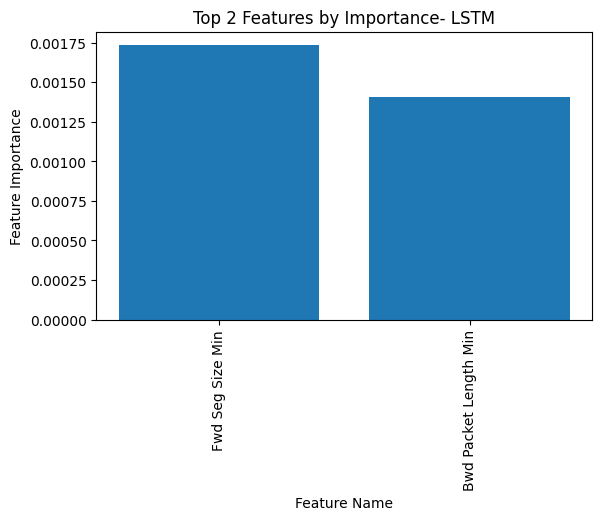

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 2 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))


precision_number_L.append(0.82)
accuracy_number_L.append(0.83)
recall_number_L.append(0.62)
f1score_number_L.append(0.69)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9315
           1       0.53      0.61      0.57      2318
           2       1.00      0.01      0.01       150
           3       0.76      0.84      0.80      2366

   micro avg       0.83      0.82      0.83     14149
   macro avg       0.81      0.59      0.57     14149
weighted avg       0.84      0.82      0.83     14149
 samples avg       0.82      0.82      0.82     14149

0.8244398897448583


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 3 features**

In [ ]:
k=3

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]

top_k_features_lstm

['Fwd Seg Size Min', 'Bwd Packet Length Min', 'Idle Mean']

In [ ]:
feature_importances_lstm=[]

for i in range(3):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

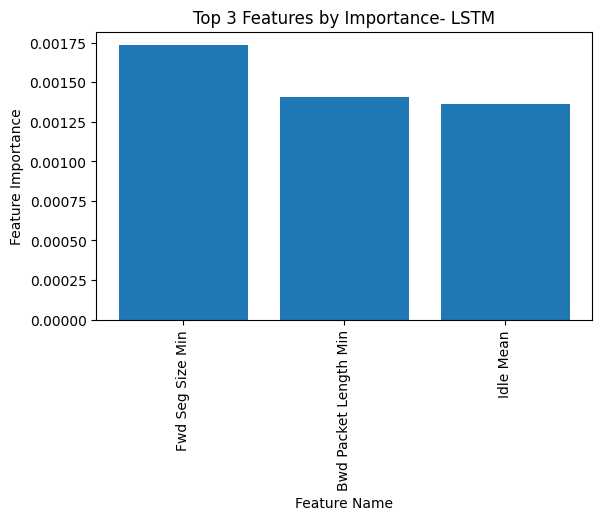

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 3 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))

precision_number_L.append(0.83)
accuracy_number_L.append(0.83)
recall_number_L.append(0.63)
f1score_number_L.append(0.70)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9315
           1       0.85      0.77      0.81      2318
           2       0.91      0.07      0.12       150
           3       0.83      0.90      0.87      2366

   micro avg       0.93      0.93      0.93     14149
   macro avg       0.89      0.68      0.69     14149
weighted avg       0.93      0.93      0.92     14149
 samples avg       0.93      0.93      0.93     14149

0.9263552194501378


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 10 features**

In [ ]:
k=10

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]

top_k_features_lstm

['Fwd Seg Size Min',
 'Bwd Packet Length Min',
 'Idle Mean',
 'FWD Init Win Bytes',
 'Average Packet Size',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Bwd IAT Total',
 'Bwd Segment Size Avg',
 'Flow IAT Std']

In [ ]:
feature_importances_lstm=[]

for i in range(10):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

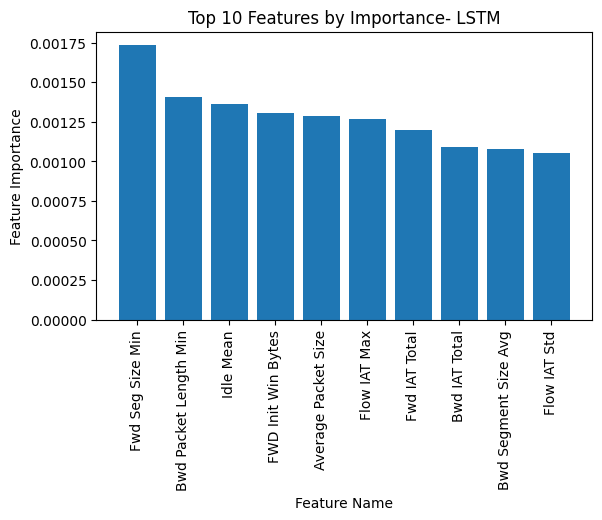

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 10 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))

precision_number_L.append(0.93)
accuracy_number_L.append(0.95)
recall_number_L.append(0.83)
f1score_number_L.append(0.87)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9315
           1       0.94      0.96      0.95      2318
           2       0.93      0.85      0.89       150
           3       0.97      0.94      0.95      2366

   micro avg       0.98      0.98      0.98     14149
   macro avg       0.96      0.94      0.95     14149
weighted avg       0.98      0.98      0.98     14149
 samples avg       0.98      0.98      0.98     14149

0.9812000848116474


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


## **Top 30 features**

In [ ]:
k=30

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]

top_k_features_lstm

['Fwd Seg Size Min',
 'Bwd Packet Length Min',
 'Idle Mean',
 'FWD Init Win Bytes',
 'Average Packet Size',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Bwd IAT Total',
 'Bwd Segment Size Avg',
 'Flow IAT Std',
 'Idle Max',
 'Fwd IAT Max',
 'Flow IAT Mean',
 'Fwd Packet Length Min',
 'FIN Flag Count',
 'Bwd Packet Length Mean',
 'Flow Packets/s',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd PSH Flags',
 'Bwd IAT Max',
 'Packet Length Min',
 'Bwd IAT Std',
 'Fwd Segment Size Avg',
 'Bwd Init Win Bytes',
 'Packet Length Mean',
 'Idle Min',
 'Bwd IAT Mean',
 'Fwd IAT Min',
 'Packet Length Std']

In [ ]:
feature_importances_lstm=[]

for i in range(30):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

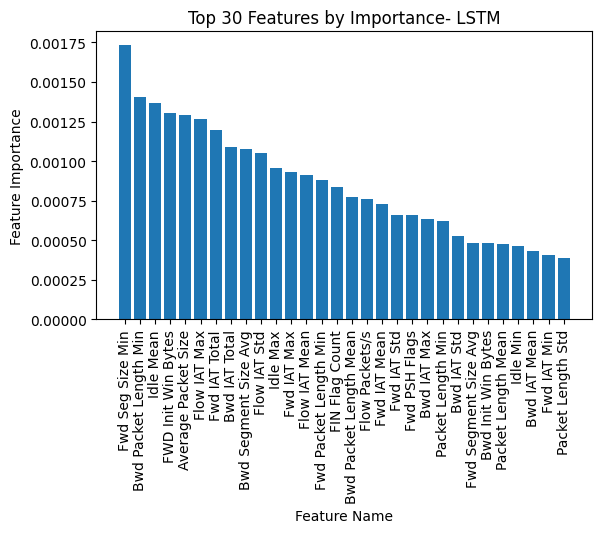

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 30 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9315
           1       0.94      0.97      0.96      2318
           2       0.96      0.89      0.92       150
           3       0.97      0.94      0.96      2366

   micro avg       0.98      0.98      0.98     14149
   macro avg       0.97      0.95      0.96     14149
weighted avg       0.98      0.98      0.98     14149
 samples avg       0.98      0.98      0.98     14149

0.9825429358965297


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


# Feature Importance: LSTM

In [ ]:
k=20

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]


In [ ]:
top_k_features_lstm

['Fwd Seg Size Min',
 'Bwd Packet Length Min',
 'Idle Mean',
 'FWD Init Win Bytes',
 'Average Packet Size',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Bwd IAT Total',
 'Bwd Segment Size Avg',
 'Flow IAT Std',
 'Idle Max',
 'Fwd IAT Max',
 'Flow IAT Mean',
 'Fwd Packet Length Min',
 'FIN Flag Count',
 'Bwd Packet Length Mean',
 'Flow Packets/s',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd PSH Flags']

In [ ]:
feature_importances_lstm=[]

for i in range(20):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

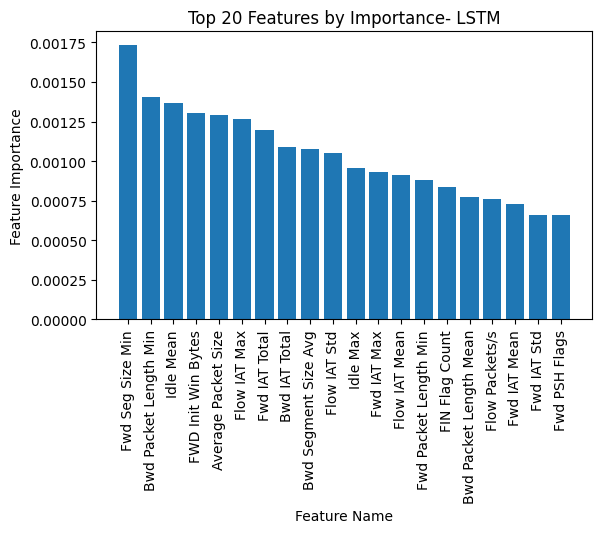

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 20 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()


# Feature Importance Validation: LSTM

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( df.loc[:,top_k_features_lstm],
                                                              onehotlabels, train_size=0.90, random_state=50)

## Random forest to validate feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))
print(accuracy_score(y_te_lstm, y_pred_rf))

precision_number_L.append(0.97)
accuracy_number_L.append(0.98)
recall_number_L.append(0.94)
f1score_number_L.append(0.96)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9315
           1       0.94      0.96      0.95      2318
           2       0.96      0.86      0.91       150
           3       0.97      0.94      0.96      2366

   micro avg       0.98      0.98      0.98     14149
   macro avg       0.97      0.94      0.95     14149
weighted avg       0.98      0.98      0.98     14149
 samples avg       0.98      0.98      0.98     14149

0.9815534666760902


Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


In [ ]:
'''import joblib
import shap
import warnings
warnings.filterwarnings("ignore")

#model =joblib.load('model.pkl')
#data = pd.read_csv('x_test.csv').drop(['Unnamed: 0'],axis=1)
#explainer = shap.Explainer(model.predict, data)
#sv = explainer_lstm(X_test)

idx = 3
exp = shap.Explanation(sv.values, sv.base_values[0][0], sv.data)
shap.plots.waterfall(explainer_lstm[idx])'''

'import joblib\nimport shap\nimport warnings\nwarnings.filterwarnings("ignore")\n\n#model =joblib.load(\'model.pkl\')\n#data = pd.read_csv(\'x_test.csv\').drop([\'Unnamed: 0\'],axis=1)\n#explainer = shap.Explainer(model.predict, data)\n#sv = explainer_lstm(X_test)\n\nidx = 3\nexp = shap.Explanation(sv.values, sv.base_values[0][0], sv.data)\nshap.plots.waterfall(explainer_lstm[idx])'

# Comparing Feature Importance across models

# Overlap Plot

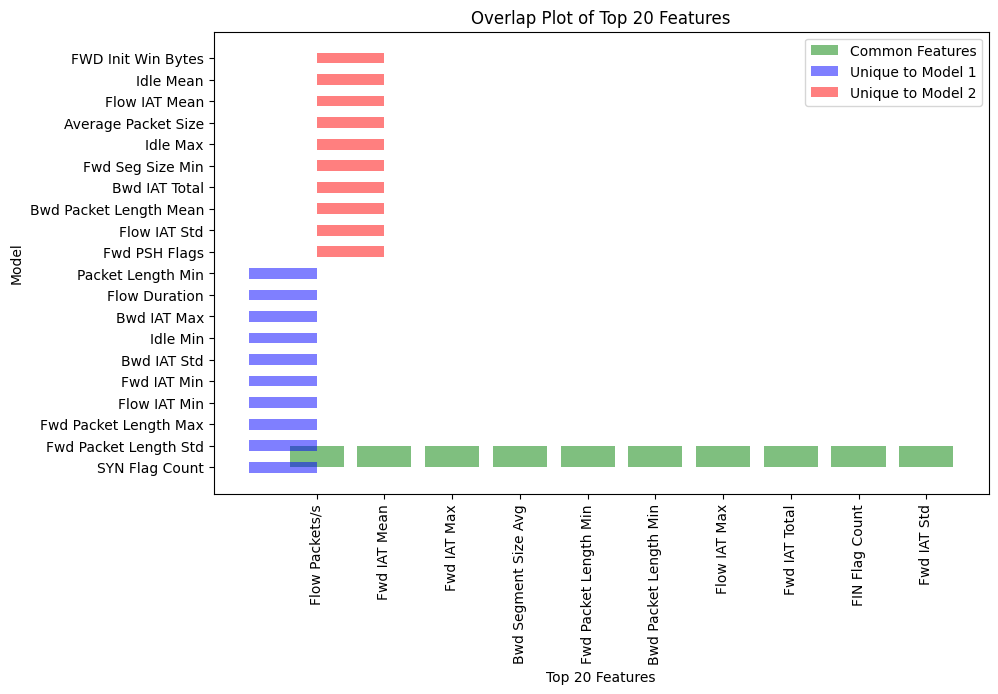

In [ ]:
import matplotlib.pyplot as plt

# define the two lists of top 20 features
#top_20_features_model_1 = ['feature_1', 'feature_2', ..., 'feature_20']
#top_20_features_model_2 = ['feature_1', 'feature_3', ..., 'feature_19']

# create a set of the top 20 features from each model
set_model_1 = set(top_k_features_cnn)
set_model_2 = set(top_k_features_lstm)

# compute the common top 20 features between the two models
common_features = list(set_model_1.intersection(set_model_2))

# compute the unique top 20 features for each model
unique_features_model_1 = list(set_model_1 - set_model_2)
unique_features_model_2 = list(set_model_2 - set_model_1)

# create the overlap plot
fig, ax = plt.subplots(figsize=(10, 6))

# plot the common features
ax.bar(common_features, height=1, color='green', alpha=0.5, label='Common Features')

# plot the unique features for model 1
ax.barh(unique_features_model_1, width=-1, height=0.5, color='blue', alpha=0.5, label='Unique to Model 1')

# plot the unique features for model 2
ax.barh(unique_features_model_2, width=1, height=0.5, color='red', alpha=0.5, label='Unique to Model 2')

# set the x and y axis labels and title
ax.set_xlabel('Top 20 Features')
ax.set_ylabel('Model')
ax.set_title('Overlap Plot of Top 20 Features')

plt.xticks(rotation=90)

# add a legend
ax.legend()

# show the plot
plt.show()


# Scatter Plot

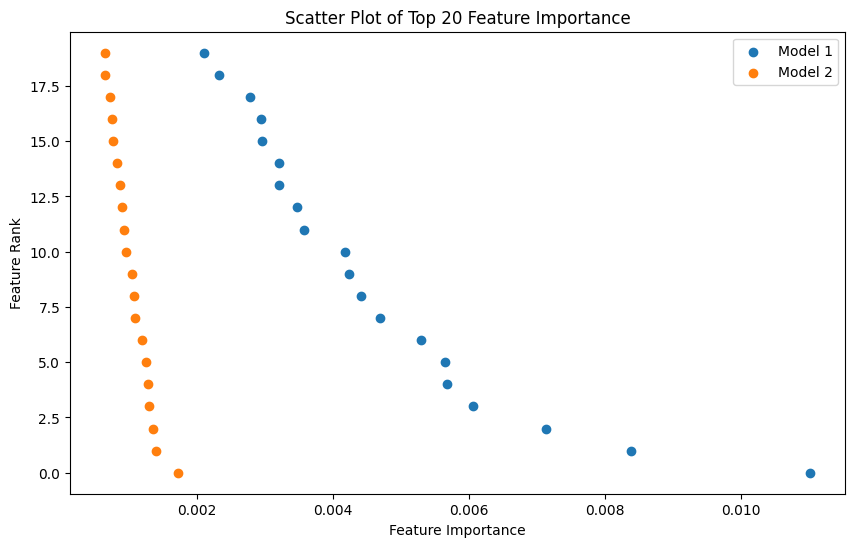

In [ ]:
import matplotlib.pyplot as plt

# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = top_k_features_cnn #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feature_importances #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = top_k_features_lstm #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feature_importances_lstm #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'Model 1': importance_model_1, 'Model 2': importance_model_2}

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for model, importance in importance_dict.items():
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # plot the feature importance values as a scatter plot
    ax.scatter(values, range(20), label=model)

# set the x and y axis labels and title
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Rank')
ax.set_title('Scatter Plot of Top 20 Feature Importance')

# add a legend
ax.legend()

# show the plot
plt.show()


# Bar Plot

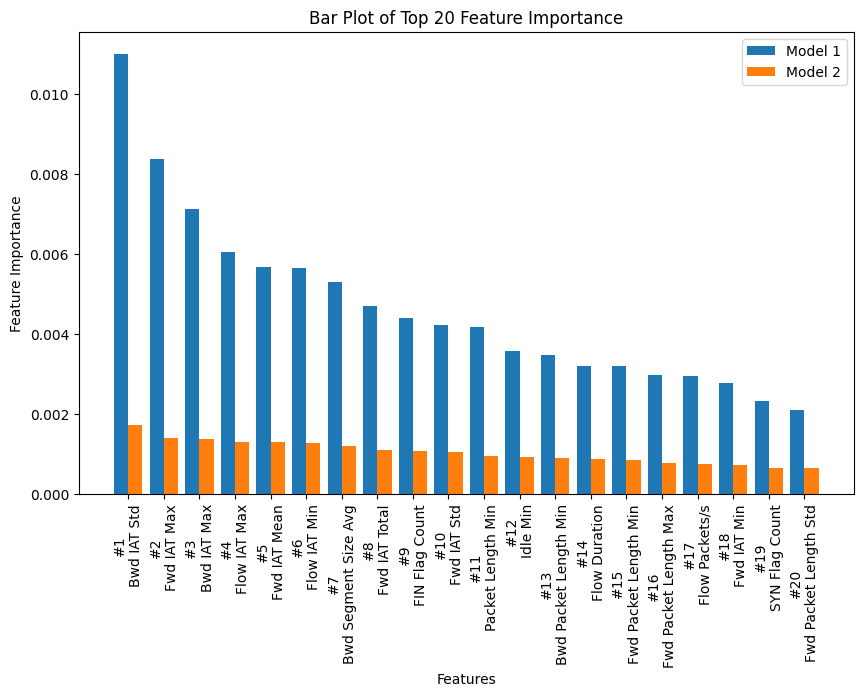

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = top_k_features_cnn #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feature_importances #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = top_k_features_lstm #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feature_importances_lstm #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'Model 1': importance_model_1, 'Model 2': importance_model_2}

# set the width of the bars
bar_width = 0.4

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for i, (model, importance) in enumerate(importance_dict.items()):
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # calculate the x-axis positions for the bars
    x_pos = np.arange(len(values)) + i * bar_width
    # plot the feature importance values as a bar plot
    ax.bar(x_pos, values, bar_width, label=model)

# set the x and y axis labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Bar Plot of Top 20 Feature Importance')

# set the x-axis tick positions and labels
xtick_pos = np.arange(20)
xtick_labels = [f'#{i+1}\n{f}' for i, f in enumerate(top_20_features_model_1)]
ax.set_xticks(xtick_pos + bar_width / 2)
ax.set_xticklabels(xtick_labels, rotation='vertical')

# add a legend
ax.legend()

# show the plot
plt.show()


# Box Plot

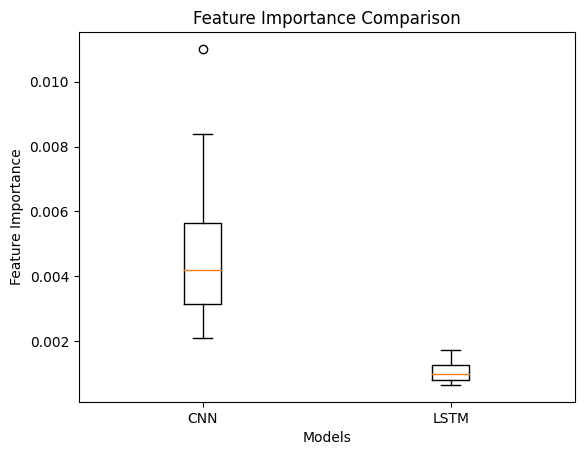

In [ ]:
import matplotlib.pyplot as plt

# sample data for two models
model1 = feature_importances# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model2 = feature_importances_lstm# [1, 2, 2, 3, 3, 3, 4, 5, 6, 10]

# create a list of the two models' data
data = [model1, model2]

# set the labels for the x-axis
labels = ['CNN', 'LSTM']

# create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# add a title and axis labels
ax.set_title('Feature Importance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Feature Importance')

# display the plot
plt.show()


## **Line chart**

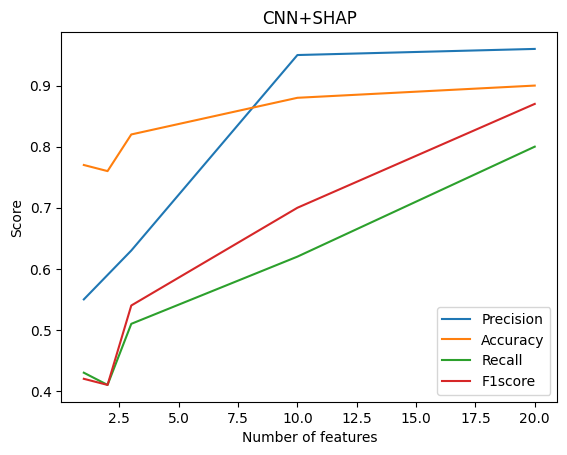

In [ ]:

import matplotlib.pyplot as plt
x= [1,2,3,10,20]

plt.plot(x, precision_number_C, label='Precision')
plt.plot(x, accuracy_number_C, label='Accuracy')
plt.plot(x, recall_number_C, label='Recall')
plt.plot(x, f1score_number_C, label='F1score')

plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('CNN+SHAP')
plt.legend()

plt.show()

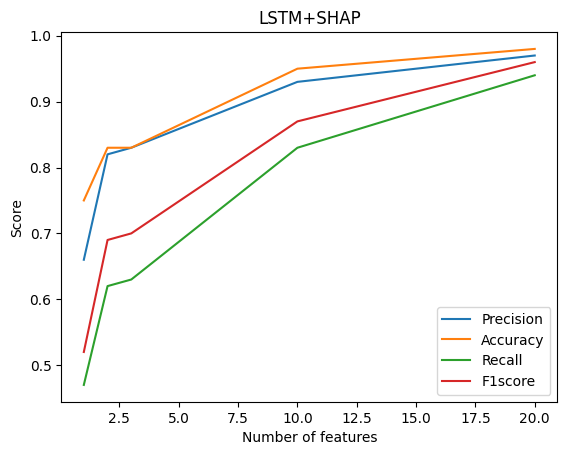

In [ ]:

import matplotlib.pyplot as plt
x= [1,2,3,10,20]

plt.plot(x, precision_number_L, label='Precision')
plt.plot(x, accuracy_number_L, label='Accuracy')
plt.plot(x, recall_number_L, label='Recall')
plt.plot(x, f1score_number_L, label='F1score')

plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('LSTM+SHAP')
plt.legend()

plt.show()